This notebook shows different visualizations of the algorithms performances

In [1]:
import config

Ran on 11 March 2019 12:28:36
Server


In [2]:
import os
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Open all the score

In [3]:
date = '07 March 2019 14:20:32'

In [4]:
path = os.path.join(config.result, date)
scores = {}
# Open each dataset
for dname in os.listdir(path):
    unpick = pickle.load(open(os.path.join(path, dname), 'rb'))
    # Restructure to have a nice pandas dataframe
    openScore = {(category, method, metric): unpick["Score"][method][category][metric] 
                    for method in unpick["Score"] 
                    for category in unpick["Score"][method]
                    for metric in unpick["Score"][method][category]}
    openScore[("Dataset", "N_Classes")] = unpick["N_Classes"]
    openScore[("Dataset", "Constraint")] = unpick["Constraint"]
    openScore[("Dataset", "Labels")] = unpick["Labels"]
    openScore[("Dataset", "Train")] = unpick["Train"]
    scores[unpick['Name']] = openScore
print("Open {} result files from {}".format(len(scores), date))

Open 79 result files from 07 March 2019 14:20:32


In [5]:
scores = pd.DataFrame.from_dict(scores, orient="index")
scores.head()

all                       \
                              ckmeans                        
                        Adjusted Rand Adjuster Mutual Info   
analcatdata_boxing1          0.315311             0.241765   
analcatdata_boxing2          0.160993             0.117884   
analcatdata_creditscore      0.182257             0.076105   
analcatdata_dmft             0.229878             0.296850   
analcatdata_germangss        0.272942             0.313880   

                                                                        test  \
                                                                     ckmeans   
                        Normalized Mutual Info Fowlkes Mallows Adjusted Rand   
analcatdata_boxing1                   0.254050        0.672009      0.001635   
analcatdata_boxing2                   0.122866        0.579283      0.012089   
analcatdata_creditscore               0.085834        0.682279     -0.073091   
analcatdata_dmft                      0.310437        0.369952      0.005527   
analcatdata_germangss                 0.332066        0.474711      0.070924   

                                                                     \
                                                                      
                        Adjuster Mutual Info Normalized Mutual Info   
analcatdata_boxing1                 0.009482               0.022513   
analcatdata_boxing2                 0.009617               0.020570   
analcatdata_creditscore             0.134977               0.156243   
analcatdata_dmft                    0.002151               0.019036   
analcatdata_germangss               0.101768               0.139292   

                                                train                       \
                                              ckmeans                        
                        Fowlkes Mallows Adjusted Rand Adjuster Mutual Info   
analcatdata_boxing1            0.517340           1.0                  1.0   
analcatdata_boxing2            0.500458           1.0                  1.0   
analcatdata_creditscore        0.584698           1.0                  1.0   
analcatdata_dmft               0.224988           1.0                  1.0   
analcatdata_germangss          0.393453           1.0                  1.0   

                                               ...                          \
                                               ...                           
                                               ...                           
analcatdata_boxing1                            ...                           
analcatdata_boxing2                            ...                           
analcatdata_creditscore                        ...                           
analcatdata_dmft                               ...                           
analcatdata_germangss                          ...                           

                                          test                  \
                         Bayesian Optimization                   
                        Normalized Mutual Info Fowlkes Mallows   
analcatdata_boxing1                  -0.000002        0.732999   
analcatdata_boxing2                   0.124314        0.569992   
analcatdata_creditscore               0.554926        0.810900   
analcatdata_dmft                      0.030831        0.173146   
analcatdata_germangss                 0.119500        0.323968   

                                        train                       \
                        Bayesian Optimization                        
                                Adjusted Rand Adjuster Mutual Info   
analcatdata_boxing1                  0.000000        -2.572157e-16   
analcatdata_boxing2                  0.134487         9.929132e-02   
analcatdata_creditscore              0.835688         7.394976e-01   
analcatdata_dmft                     0.009645         1.496879e-02   
analcatdata_germangss                0.108393         1.29

# Comparison

In [36]:
metric = "Adjusted Rand"
category = "test" # 'all', 'train' or 'test'

## Global performance

Compute the global performances of the different methods

Text(0.5,0,'Adjusted Rand')

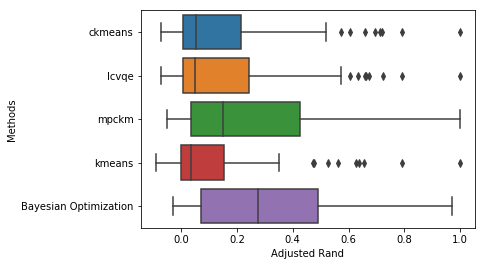

In [37]:
measure = scores.loc[:, (category, slice(None), metric)]
measure = measure.T.reset_index(level=[0, 2], drop=True).T
sns.boxplot(data = measure, orient="h")
plt.ylabel("Methods")
plt.xlabel(metric)

Text(0.5,0,'Adjusted Rand')

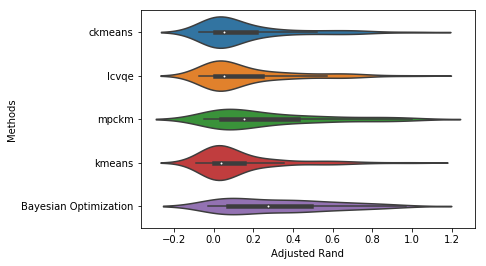

In [38]:
sns.violinplot(data = measure, orient="h")
plt.ylabel("Methods")
plt.xlabel(metric)

/zfsauton/home/vjeanselme/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/zfsauton/home/vjeanselme/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/zfsauton/home/vjeanselme/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5,210.64,'Adjusted Rand')

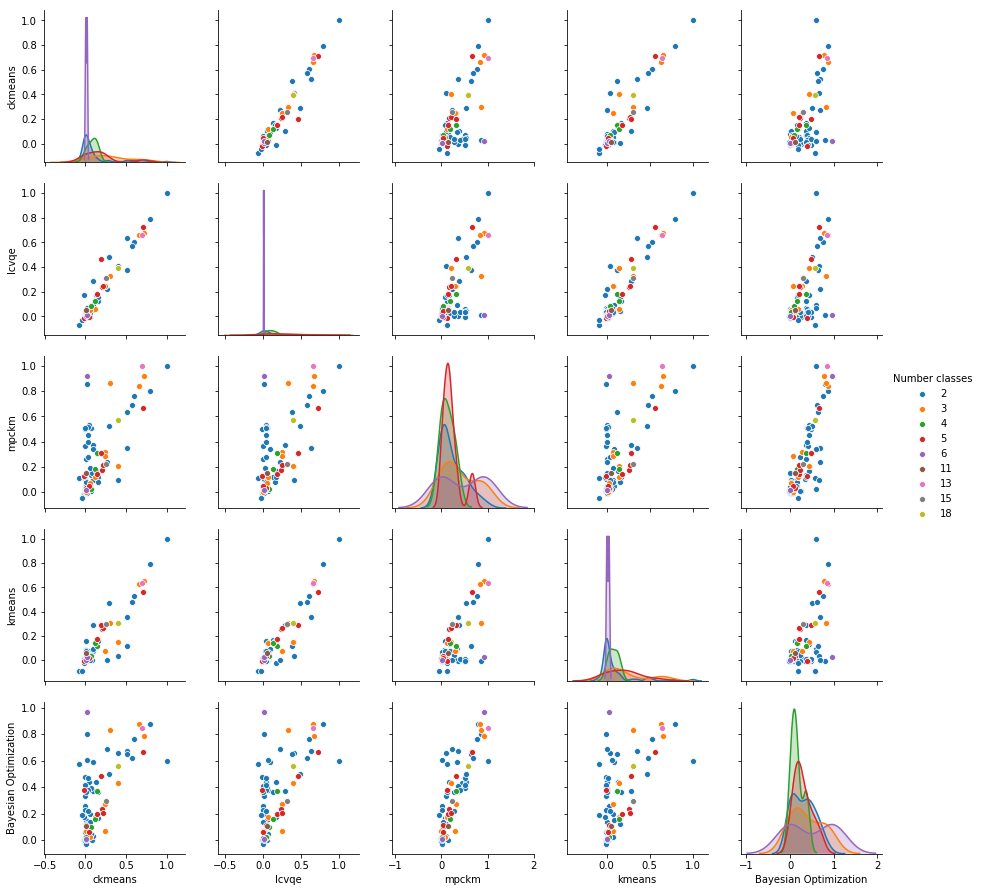

In [45]:
measure["Number classes"] = scores[("Dataset", "N_Classes", )]
sns.pairplot(data = measure, hue = "Number classes", vars = [c for c in measure.columns if c != "Number classes"])
plt.ylabel("Methods")
plt.xlabel(metric)

## First ranked

Compute and display the rank of the different methods

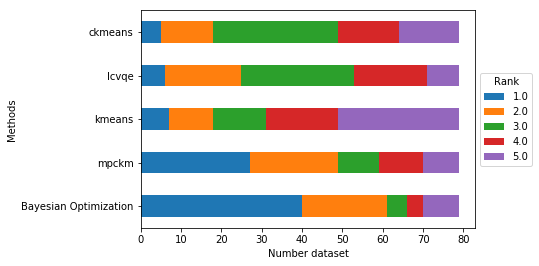

In [9]:
# Count rank position
rank = measure.rank(axis = 1, method = 'min',ascending = False).apply(lambda x: x.value_counts()).T 
rank = rank.sort_values(by=[1, 2, 3], ascending = False) # Reorder
rank.plot.barh(stacked=True)
plt.xlabel("Number dataset")
plt.ylabel("Methods")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Rank")

# Analysis by method

In [12]:
method = "Bayesian Optimization"
metric = "Adjusted Rand"

## Train vs Test

Compare performances between training and test, it is interesting to notice how our method does not overfit where other methods perform well on training but have bad performances on test.

/zfsauton/home/vjeanselme/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


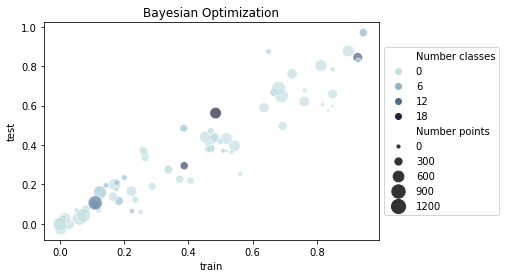

In [13]:
measure = scores.loc[:, ([slice(None)], method, metric)]
measure = measure.T.reset_index(level=[1, 2], drop=True).T
measure["Number points"] = scores[("Dataset", "Labels", )].apply(lambda x: len(x.values[0]), axis = 1) 
measure["Number classes"] = scores[("Dataset", "N_Classes", )]
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
plt.title(method)
sns.scatterplot(x="train", y="test", sizes=(10, 200), data=measure, 
                size="Number points", hue="Number classes", palette = cmap, alpha = 0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))